In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

path = [['M', 111.003, 733.003], ['Q', 111, 733, 110.5, 732], ['Q', 110, 731, 109.5, 730], ['Q', 109, 729, 107.5, 727], ['Q', 106, 725, 104.5, 722.5], ['Q', 103, 720, 102, 716.5], ['Q', 101, 713, 99, 708], ['Q', 97, 703, 95, 698], ['Q', 93, 693, 90, 686.5], ['Q', 87, 680, 85, 673.5], ['Q', 83, 667, 81.5, 655.5], ['Q', 80, 644, 80, 630], ['Q', 80, 616, 80, 603], ['Q', 80, 590, 80, 580], ['Q', 80, 570, 80, 563.5], ['Q', 80, 557, 80, 553.5], ['Q', 80, 550, 80, 549], ['L', 80, 547.997]]
x_coords = []
y_coords = []

for command in path:
    # Check if the command is a "move to" or a "line to" command
    if command[0] == 'M' or command[0] == 'L':
        x_coords.append(command[1])
        y_coords.append(command[2])
    # Check if the command is a "quadratic curve to" command
    elif command[0] == 'Q':
        x_coords.append(command[1])
        y_coords.append(command[2])
        x_coords.append(command[3])
        y_coords.append(command[4])

print("x coordinates:", x_coords)
print("y coordinates:", y_coords)

# plot the x_coords and y_coords

x coordinates: [111.003, 111, 110.5, 110, 109.5, 109, 107.5, 106, 104.5, 103, 102, 101, 99, 97, 95, 93, 90, 87, 85, 83, 81.5, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]
y coordinates: [733.003, 733, 732, 731, 730, 729, 727, 725, 722.5, 720, 716.5, 713, 708, 703, 698, 693, 686.5, 680, 673.5, 667, 655.5, 644, 630, 616, 603, 590, 580, 570, 563.5, 557, 553.5, 550, 549, 547.997]


In [2]:
import ast

# Define a function to extract x,y coordinate pairs from path commands
def get_coordinates(path_commands):
    current_point = [0,0]
    coordinates = []
    for command in path_commands:
        if command[0] == 'M':
            current_point = command[1:]
            coordinates.append(current_point)
        elif command[0] == 'L':
            current_point = command[1:]
            coordinates.append(current_point)
        elif command[0] == 'Q':
            control_point = command[1:3]
            end_point = command[3:]
            for t in range(1, 11):
                t_normalized = t / 10
                x = (1 - t_normalized) ** 2 * current_point[0] + 2 * t_normalized * (1 - t_normalized) * control_point[0] + t_normalized ** 2 * end_point[0]
                y = (1 - t_normalized) ** 2 * current_point[1] + 2 * t_normalized * (1 - t_normalized) * control_point[1] + t_normalized ** 2 * end_point[1]
                coordinates.append([x, y])
            current_point = end_point
    return coordinates

path_commands = pd.read_csv("path.csv")
coordinates = pd.DataFrame()
#path_commands["path"][1]
for i in range(len(path_commands)):
    # path is located in path_commands['path'][i]
    id, class_, path = i,path_commands["stroke"][i], get_coordinates(ast.literal_eval(path_commands["path"][i]))
    # append the coordinates to the dictionary as class_, path key, value pair
    coordinates[i] = [class_, path]
    
  


# # Define the path string
# path = [['M', 162.003, 729.003], ['Q', 162, 729, 161, 724], ['Q', 160, 719, 158.5, 711.5], ['Q', 157, 704, 154, 696], ['Q', 151, 688, 148, 676.5], ['Q', 145, 665, 142, 654], ['Q', 139, 643, 137, 635.5], ['Q', 135, 628, 132, 615.5], ['Q', 129, 603, 126.5, 595.5], ['Q', 124, 588, 123.5, 584.5], ['Q', 123, 581, 122, 577.5], ['Q', 121, 574, 120.5, 571], ['Q', 120, 568, 119.5, 565.5], ['Q', 119, 563, 119, 562.5], ['L', 119, 561.997]]

# # Parse the path string into a list of path commands
# path_commands = get_coordinates(path)

 

In [3]:
# get x, y value pairs from coordinates
x_coords = []
y_coords = []
for key, value in coordinates.items():
    for x, y in value[1]:
        x_coords.append(x)
        y_coords.append(y)

print(x_coords)

[155.997, 156.00257000000002, 156.01808000000003, 156.04353, 156.07891999999998, 156.12425000000002, 156.17952, 156.24473, 156.31988, 156.40497000000002, 156.5, 156.62, 156.78000000000003, 156.98, 157.22, 157.5, 157.82, 158.18, 158.58, 159.02, 159.5, 160.08, 160.82000000000005, 161.72, 162.77999999999997, 164.0, 165.38, 166.92000000000002, 168.62, 170.48000000000002, 172.5, 174.53500000000003, 176.44000000000003, 178.21499999999997, 179.86, 181.375, 182.76, 184.015, 185.14, 186.135, 187.0, 187.79, 188.56000000000003, 189.30999999999997, 190.04000000000002, 190.75, 191.44, 192.11, 192.76, 193.39000000000001, 194.0, 194.57000000000002, 195.08000000000004, 195.52999999999997, 195.92000000000002, 196.25, 196.52, 196.73000000000002, 196.88, 196.97000000000003, 197.0, 197, 230.997, 231.05257000000003, 231.21808000000007, 231.49353, 231.87892000000002, 232.37425000000002, 232.97951999999998, 233.69473, 234.51988000000003, 235.45497, 236.5, 237.57500000000002, 238.60000000000008, 239.575, 240.

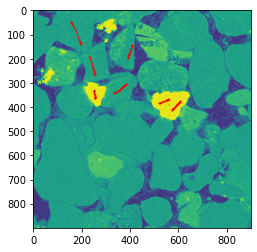

In [5]:
from PIL import Image
img = Image.open("img.png")

plt.imshow(img)
plt.scatter(x_coords, y_coords, c='r', s=0.1)


In [6]:
# transpose coordinates
coordinates = coordinates.T
#coordinates
coordinates.columns = ["class", "path"]
# separate the values in the path column into individual rows 
coordinates = coordinates.explode("path")

# search the x,y coordinates given in the path column in the image and get the pixel values assigned to a new column "pixel_value"
coordinates["pixel_value"] = coordinates["path"].apply(lambda x: img.getpixel((x[0], x[1])))


classes = coordinates["class"].unique()
classes = list(classes)

# convert the classes in the class column to integers from the list classes to 0,1,...,n
coordinates["class"] = coordinates["class"].apply(lambda x: classes.index(x))





In [7]:
# split the path column into x and y coordinates
coordinates["x"] = coordinates["path"].apply(lambda x: x[0])
coordinates["y"] = coordinates["path"].apply(lambda x: x[1])
coordinates

,class,path,pixel_value,x,y
0,0,"[155.997, 47.997]",148,155.99700,47.99700
0,0,"[156.00257000000002, 48.002570000000006]",156,156.00257,48.00257
0,0,"[156.01808000000003, 48.01808000000001]",156,156.01808,48.01808
0,0,"[156.04353, 48.04353]",156,156.04353,48.04353
0,0,"[156.07891999999998, 48.07892]",156,156.07892,48.07892
...,...,...,...,...,...
6,1,"[572.845, 411.11]",247,572.84500,411.11000
6,1,"[572.72, 411.26000000000005]",247,572.72000,411.26000
6,1,"[572.605, 411.39]",247,572.60500,411.39000
6,1,"[572.5, 411.5]",247,572.50000,411.50000


In [8]:
# count values in the class column
coordinates["class"].value_counts()

0    278
1    236
Name: class, dtype: int64

In [9]:
coordinates.sample(10)

,class,path,pixel_value,x,y
0,0,"[190.04000000000002, 124.55999999999999]",149,190.04000,124.56000
2,0,"[398.04499999999996, 174.53000000000003]",154,398.04500,174.53000
1,0,"[253.0, 263.875]",144,253.00000,263.87500
6,1,"[607.9419200000001, 375.07808000000006]",247,607.94192,375.07808
1,0,"[231.05257000000003, 189.17257000000004]",155,231.05257,189.17257
3,0,"[343.625, 336.375]",152,343.62500,336.37500
1,0,"[250.0, 252.0]",150,250.00000,252.00000
0,0,"[156.00257000000002, 48.002570000000006]",156,156.00257,48.00257
1,0,"[237.57500000000002, 209.92500000000004]",154,237.57500,209.92500
4,1,"[251.69, 343.04499999999996]",247,251.69000,343.04500


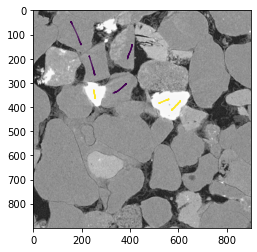

In [10]:

img = Image.open("img.png")

plt.imshow(img, cmap="gray")

# plot the x,y coordinates with the pixel values as color
plt.scatter(coordinates["x"], coordinates["y"], c=coordinates["class"], s=0.1)


In [11]:
dataset = coordinates[["pixel_value", "class"]]
dataset

,pixel_value,class
0,148,0
0,156,0
0,156,0
0,156,0
0,156,0
...,...,...
6,247,1
6,247,1
6,247,1
6,247,1


In [12]:
classes = coordinates["class"].unique()
list(classes)

[0, 1]

In [13]:
dataset = coordinates[["class", "pixel_value"]]

# train a model to predict the class of the pixel value
from sklearn.model_selection import train_test_split

X = dataset["pixel_value"]
y = dataset["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
dataset

,class,pixel_value
0,0,148
0,0,156
0,0,156
0,0,156
0,0,156
...,...,...
6,1,247
6,1,247
6,1,247
6,1,247


In [14]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# reshape the data to fit the model
rf.fit(X_train.values.reshape(-1, 1), y_train)
#rf.fit(X_train, y_train)

y_pred = rf.predict(X_test.values.reshape(-1, 1))

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



1.0

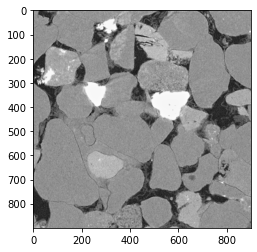

In [15]:
# use the model to predict the class of the pixel values in the image
img = Image.open("img.png")

plt.imshow(img, cmap="gray")

# get the pixel values from the image
pixel_values = []
for x in range(img.size[0]):
    for y in range(img.size[1]):
        pixel_values.append(img.getpixel((x, y)))

# reshape the pixel values to fit the model
pixel_values = np.array(pixel_values).reshape(-1, 1)

# predict the class of the pixel values
predictions = rf.predict(pixel_values)

# reshape the predictions to fit the image
# invert the predictions image



In [ ]:
def graph_imgs(imgs, titles):
    fig, ax = plt.subplots(1, len(imgs), figsize=(10,10))
    for i in range(len(imgs)):
        ax[i].imshow(imgs[i], cmap='gray')
        if titles:
            ax[i].set_title(titles[i])
    plt.show()

predictions_image = predictions.reshape(img.size[1], img.size[0])


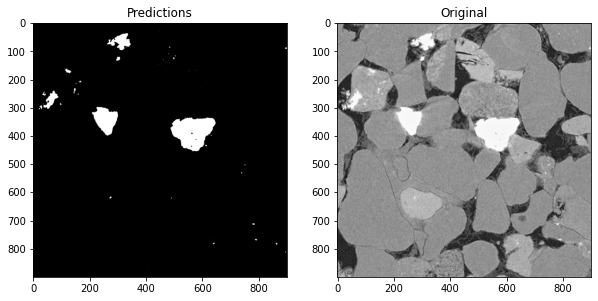

In [ ]:
# mirror the predictions image
predictions_image = np.flip(predictions_image, axis=0)
# rotate 90 degrees to the right
predictions_image = np.rot90(predictions_image, k=1)
graph_imgs([predictions_image, img], ["Predictions", "Original"])


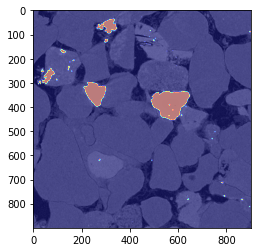

In [ ]:
# overlay the predictions image on the original image
plt.imshow(img, cmap="gray")
plt.imshow(predictions_image, cmap="jet", alpha=0.5)


In [ ]:
# get unique values in the predictions array
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)



[[     0 786731]
 [     1  23269]]


In [ ]:
# transpose coordinates
coordinates = coordinates.T
coordinates
coordinates.columns = ["class", "path"]
# merge same class and agregate path values
coordinates = coordinates.groupby("class").agg(lambda x: list(x))
coordinates["path"] = coordinates["path"].apply(lambda x: [item for sublist in x for item in sublist])
coordinates = coordinates.reset_index()

# create a x, y, class dataframe separating the x,y points in path column and assigning the class




<ipython-input-99-9062e021593e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"x": coordinates["path"][i][j], "y": coordinates["path"][i][j+1], "class": coordinates["class"][i]}, ignore_index=True)
<ipython-input-99-9062e021593e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"x": coordinates["path"][i][j], "y": coordinates["path"][i][j+1], "class": coordinates["class"][i]}, ignore_index=True)
<ipython-input-99-9062e021593e>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"x": coordinates["path"][i][j], "y": coordinates["path"][i][j+1], "class": coordinates["class"][i]}, ignore_index=True)
<ipython-input-99-9062e021593e>:13: FutureWarning: The frame.append method is d

,x,y,class
0,"[12.997, 143.003]","[13.02257, 142.97243]",#000
1,"[13.098080000000003, 142.88192]","[13.223529999999998, 142.73146999999997]",#000
2,"[13.39892, 142.52107999999998]","[13.62425, 142.25074999999998]",#000
3,"[13.89952, 141.92048]","[14.224730000000001, 141.53027]",#000
4,"[14.59988, 141.08012000000002]","[15.024970000000001, 140.57003]",#000
...,...,...,...
1988,"[614.9800000000001, 392.68000000000006]","[614.9549999999999, 392.755]",#0F0
1989,"[614.9200000000001, 392.81999999999994]","[614.875, 392.875]",#0F0
1990,"[614.82, 392.91999999999996]","[614.755, 392.955]",#0F0
1991,"[614.6800000000001, 392.98]","[614.595, 392.995]",#0F0


In [ ]:
# convert "[['M', 162.003, 729.003], ['Q', 162, 729, 161, 724]]" string to [['M', 162.003, 729.003], ['Q', 162, 729, 161, 724]] list
path = "[['M', 162.003, 729.003], ['Q', 162, 729, 161, 724], ['Q', 160, 719, 158.5, 711.5], ['Q', 157, 704, 154, 696], ['Q', 151, 688, 148, 676.5], ['Q', 145, 665, 142, 654], ['Q', 139, 643, 137, 635.5], ['Q', 135, 628, 132, 615.5], ['Q', 129, 603, 126.5, 595.5], ['Q', 124, 588, 123.5, 584.5], ['Q', 123, 581, 122, 577.5], ['Q', 121, 574, 120.5, 571], ['Q', 120, 568, 119.5, 565.5], ['Q', 119, 563, 119, 562.5], ['L', 119, 561.997]]"

path_commands = ast.literal_eval(path)
print(type(path_commands))
print(path_commands)


<class 'list'>
[['M', 162.003, 729.003], ['Q', 162, 729, 161, 724], ['Q', 160, 719, 158.5, 711.5], ['Q', 157, 704, 154, 696], ['Q', 151, 688, 148, 676.5], ['Q', 145, 665, 142, 654], ['Q', 139, 643, 137, 635.5], ['Q', 135, 628, 132, 615.5], ['Q', 129, 603, 126.5, 595.5], ['Q', 124, 588, 123.5, 584.5], ['Q', 123, 581, 122, 577.5], ['Q', 121, 574, 120.5, 571], ['Q', 120, 568, 119.5, 565.5], ['Q', 119, 563, 119, 562.5], ['L', 119, 561.997]]


In [ ]:
from PIL import Image

img = Image.open('img.png')


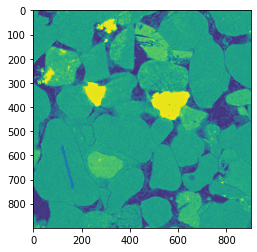

In [ ]:
# plot image
plt.imshow(img)
# overlay the path commands

plt.scatter([x[0] for x in path_commands], [x[1] for x in path_commands], s=0.5)

#plt.scatter([x[0] for x in path_commands], [x[1] for x in path_commands])